In [ ]:
'''
Topic Modeling of 20 newspaper dataset with Latent Dirichlet Allocation Algorithm.

In the beginning we have worked with a basic Latent Dirichlet Allocation model from sklearn.
    - Shown the top words of each cluster
    - Shown distribution of each topic in each document
    - Plotted the clusters of the documents
    - Shown the topic modeling output with pyLDAvis
Then we tuned the Latent Dirichlet Allocation Algorithm parameter( number of components and learning decay) with GridSearchCV.
    - Plotted the likelihood scores for different parameters in tunning
    - Shown the best tunning results
    - Learned the best Latent Dirichlet Allocation model with 20 newspaper dataset
    - Shown the top words of each cluster
    - Shown distribution of each topic in each document
    - Plotted the clusters of the documents

'''

'\nTopic Modeling of 20 newspaper dataset with Latent Dirichlet Allocation Algorithm.\n\nIn the beginning we have worked with a basic Latent Dirichlet Allocation model from sklearn.\n    - Shown the top words of each cluster\n    - Shown distribution of each topic in each document\n    - Plotted the clusters of the documents\n    - Shown the topic modeling output with pyLDAvis\nThen we tuned the Latent Dirichlet Allocation Algorithm parameter( number of components and learning decay) with GridSearchCV.\n    - Plotted the likelihood scores for different parameters in tunning\n    - Shown the best tunning results\n    - Learned the best Latent Dirichlet Allocation model with 20 newspaper dataset\n    - Shown the top words of each cluster\n    - Shown distribution of each topic in each document\n    - Plotted the clusters of the documents\n\n'

In [ ]:
'''
# importing libraries
fetch_20newsgroups -> Dataset imported
LatentDirichletAllocation -> Implement Latent Dirichlet Allocation 
CountVectorizer, TfidfVectorizer -> Feature extraction
GridSearchCV -> for tuning the parameter of the Latent Dirichlet Allocation and getting the best model
numpy -> for array operations
pandas -> for visualting the chances of a documents can be in each topics
matplotlib -> to plot the clusters
Singular Value Decomposition(TruncatedSVD) -> to transform the features in to 2D points so that we can plot each documents as a scatter point and help to visualize the clusters
pyLDAvis -> topic modeling output visualization
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# fetching the dataset from scikit-learn removing the 'headers', 'footers', 'quotes'
dataset = fetch_20newsgroups(subset='all',shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
no_features = 1000 # number of features to be extracted from each documents
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english',token_pattern='[a-zA-Z0-9]{3,}') # intializing tfidf vectorizer
tfidfvect_data = tfidf_vectorizer.fit_transform(dataset.data) # fitting the data into tfidf vectorizer
count_vectorizer = CountVectorizer(ngram_range=(1,1), stop_words="english")# intializing count vectorizer
countvect_data=count_vectorizer.fit_transform(dataset.data)# fitting the data into count vectorizer
#vectors_data = tfidf_vectorizer.fit_transform(dataset.data)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out() # features of the tfidf vectorizer
count_feature_names = count_vectorizer.get_feature_names_out() # features of the count vectorizer

In [ ]:
'''
Building the basic Latent Dirichlet Allocation 
As we are using 20 newspaper dataset we might want to cluster into 20 different groups thats why n_component=20
the learning method is Online variational Bayes method (online).
In each EM update, the algorithm uses mini-batch of training data to update the topics(components_) variable incrementally. The learning rate is controlled by the
learning_decay and the learning_offset parameters.
Learning Decay: It is a parameter that control learning rate in the online learning method. The value should be set between (0.5, 1.0] to guarantee asymptotic convergence. 
Learning Offset:A (positive) parameter that downweights early iterations in online learning. It should be greater than 1.0. It is also known as tau
'''
def LDA(data):
  # Creating the Latent Dirichlet Allocation 
  lda = LatentDirichletAllocation( learning_method="online", n_components=20, n_jobs=1,random_state=2, learning_decay=0.7, learning_offset=10) 
  lda.fit(data) #Fitting the Data in to the Latent Dirichlet Allocation model
  return lda #returning the learned Latent Dirichlet Allocation model

In [ ]:
basic_lda=LDA(tfidfvect_data) # creating and learning the Basic Latent Dirichlet Allocation model
#basic_lda=LDA(countvect_data) # creating and learning the Basic Latent Dirichlet Allocation model

In [ ]:
results=basic_lda.transform(tfidfvect_data) # results after transforming the data into Latent Dirichlet Allocation model  
#results=basic_lda.transform(countvect_data) # results after transforming the data into Latent Dirichlet Allocation model  

In [ ]:
'''
Tuning the parametrs n_components and learning_decay of the Latent Dirichlet Allocation with GridSearchCV
data= Dataset of documents
'''
def tuneLDA(data):
  model= GridSearchCV(error_score='raise', #will raise error occur in estimator fitting.
                      estimator=LatentDirichletAllocation(learning_decay=0.7, learning_method="online",learning_offset=10.0, n_components=10, random_state=2,), # providing the Latent Dirichlet Allocation model
                      param_grid={'n_components': [6,10,15,20], 'learning_decay': [0.5,0.6,0.7,0.8,0.9]}, # parameter values to get the best pairs
                      refit=True, return_train_score='warn')
  model.fit(data) # fit the data into the model
  return model # return the tuning results

In [ ]:
model=tuneLDA(tfidfvect_data) # tuning parameter of the Latent Dirichlet Allocation model 

In [ ]:
'''
Plotting the Latent Dirichlet Allocation Tuning results
model= Tuned Latent Dirichlet Allocation model
n_topics= topics array used for tunning 
'''
def plotLDATuning(model,n_topics):
  #intialising the array to store mean_train_score of each  learning decay in the tunning 
  l5=[]
  l7=[]
  l9=[]
  l6=[]
  #storing the mean train score of each learning decay in each number of components from tunning data
  for i in range(len(model.cv_results_['params'])):
      if(model.cv_results_['params'][i]['learning_decay']==0.5):
              l5.append(round(model.cv_results_['mean_test_score'][i]))
      elif(model.cv_results_['params'][i]['learning_decay']==0.7):
            l7.append(round(model.cv_results_['mean_test_score'][i]))
      elif(model.cv_results_['params'][i]['learning_decay']==0.9):
            l9.append(round(model.cv_results_['mean_test_score'][i]))
      elif(model.cv_results_['params'][i]['learning_decay']==0.6):
            l6.append(round(model.cv_results_['mean_test_score'][i]))
  plt.figure(figsize=(12, 8))# giving the figure size as 12 X 8
  plt.plot(n_topics, l5, label='0.5') # plotting the mean train score for learning decay = 0.5
  plt.plot(n_topics, l6, label='0.6')# plotting the mean train score for learning decay = 0.6
  plt.plot(n_topics, l7, label='0.7')# plotting the mean train score for learning decay = 0.7
  plt.plot(n_topics, l9, label='0.9')# plotting the mean train score for learning decay = 0.9
  plt.title("Choosing Optimal LDA Model") # title of the figure
  plt.xlabel("Num Topics") # x label of the figure
  plt.ylabel("Log Likelihood Scores(mean_test_score)") # y label of the figure
  plt.legend(title='Learning decay', loc='best') # legend of the figure
  plt.show() #showing the fugure


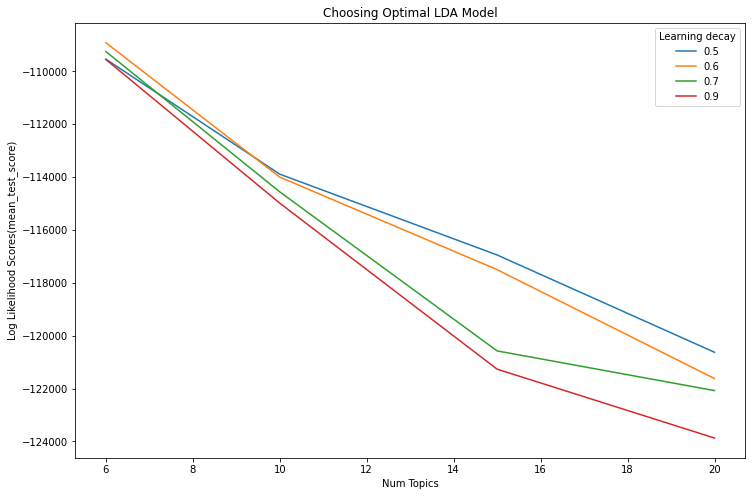

In [ ]:
plotLDATuning(model,[6,10,15,20])# plotting the tunning results

In [ ]:
best_tuned_lda=model.best_estimator_ # getting the best Latent Dirichlet Allocation model from the tuned results

In [ ]:
'''
displaying the best parameters, best score and perplexity of the best model
model = Tuned Latent Dirichlet Allocation model
data = dataset of the documents 
'''
def displayTunedParameters(model, data):
  best_lda_model = model.best_estimator_ # best model from the Tuned Latent Dirichlet Allocation models
  print("Best Model's Params: ", model.best_params_) # printing the best parameter from the tunning results
  print("Best Log Likelihood Score: ", model.best_score_) # printing the best score from the tunning results

In [ ]:
displayTunedParameters(model, tfidfvect_data) # displaying the best tuned parameters and performance from the tunning results

Best Model's Params:  {'learning_decay': 0.6, 'n_components': 6}
Best Log Likelihood Score:  -108915.54291798337


In [ ]:
'''
displaying the N top words of each topics
model= learned Latent Dirichlet Allocation model
feature names= Words to map with the vectorizer value
n_top_words= Number of top words
'''
def displayTopics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):# iterarting through each cluster topic
        print ("Topic %d:" % (topic_idx)) # printing the cluster number or topic number
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])) # printing the n top words of the cluster

In [ ]:
# basic_lda=LDA(tfidfvect_data) # creating and learning the Basic Latent Dirichlet Allocation model
# #basic_lda=LDA(countvect_data) # creating and learning the Basic Latent Dirichlet Allocation model
# results=basic_lda.transform(tfidfvect_data) # results after transforming the data into Latent Dirichlet Allocation model  
# #results=basic_lda.transform(countvect_data) # results after transforming the data into Latent Dirichlet Allocation model  
no_top_words = 10 # number of top words
#clusterslabel=getCluster(results) # getting the cluster label from the results
displayTopics(basic_lda, tfidf_feature_names, no_top_words) # displaying the top words of each topic
#displayTopics(basic_lda, count_feature_names, no_top_words) # displaying the top words of each topic

Topic 0:
know thanks wondering michael don sure like heard let 1990
Topic 1:
game games team baseball season players play win league year
Topic 2:
bike insurance station white black city blue inside radio color
Topic 3:
gun guns knows 000 van did 500 study doubt break
Topic 4:
phone number 800 yes led heard company board light line
Topic 5:
key space chip clipper use data encryption information keys technology
Topic 6:
edu mike steve article news clock mhz canada cause think
Topic 7:
sale mail offer email shipping price condition interested new asking
Topic 8:
car cars engine mark model ago gas room class wasn
Topic 9:
drive scsi card drivers bus drives controller disk ide apple
Topic 10:
god jesus people believe say think christian bible don does
Topic 11:
list com edu deleted xterm alt posting font mit david
Topic 12:
test normal btw guy groups isn define true non lots
Topic 13:
thanks medical sorry appreciate patients info cancer 1st hello sci
Topic 14:
faq got disease shall happy q

In [ ]:
no_top_words = 10 # number of top words
best_results=best_tuned_lda.transform(tfidfvect_data) # results after transforming the data into Latent Dirichlet Allocation model  
best_topicnames = ["Topic" + str(i) for i in range(best_tuned_lda.n_components)]
#best_clusterslabel=getCluster(best_results) # getting the cluster label from the results
displayTopics(best_tuned_lda, tfidf_feature_names, no_top_words) # displaying the top words of each topic

Topic 0:
don just people like think know time good right make
Topic 1:
sale offer condition shipping asking sell insurance excellent new car
Topic 2:
god jesus christian church religion bible christians christ believe faith
Topic 3:
thanks edu mail chip key know ftp does information email
Topic 4:
windows drive use card dos problem mac window using software
Topic 5:
game team games year israel play win season hockey players


In [ ]:
'''
displaying the distribution list of the topics in each docuements
results = topic modeling distribution of each documents
'''
def displayDistribution(results):
  column=[] # array to store the topic label
  topic=np.unique(results.argmax(axis=1)) # getting the topic with maximum distribution as the cluster label of each documents
 
  for i in range(len(topic)):
    column.append("topic "+str(i)) # appending the cluster label in array
  df_document_topic = pd.DataFrame(np.round(results, 2), columns=column)# converting the results into numpy array
  df_document_topic['dominant_topic'] = results.argmax(axis=1)
  return df_document_topic # returing a pandas dataframe to visualize the distribution of the topics in each docuements

In [ ]:
'''
function to highlight the topic dictribution higher than 0.1 with green color
'''
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

In [ ]:
'''
function to highlight the topic dictribution higher than 0.1 with bold weight
'''
def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

In [ ]:
'''
displaying the N top documents of each topic distribution
df= pandas datafrane of topic-document distribution
n= Number of top documents
'''
def displayTopdocuments(df, n):
  return df.head(n).style.applymap(color_green).applymap(make_bold) # display n top documents with their topic distribution

In [ ]:
df=displayDistribution(results) # creating the topic-document distribution dataframe
displayTopdocuments(df,10) # showing top N documents with their topic distribution

,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9,topic 10,topic 11,topic 12,topic 13,topic 14,topic 15,topic 16,topic 17,topic 18,topic 19,dominant_topic
0,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0
1,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.740000,0.010000,18
2,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.630000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.020000,0.230000,0.010000,10
3,0.010000,0.010000,0.010000,0.010000,0.010000,0.030000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.840000,0.010000,18
4,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.360000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.470000,0.010000,0.010000,0.010000,0.010000,15
5,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.820000,0.010000,18
6,0.010000,0.010000,0.010000,0.010000,0.010000,0.070000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.760000,0.010000,0.010000,17
7,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.790000,0.010000,0.010000,17
8,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.080000,0.010000,0.010000,0.700000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,10
9,0.010000,0.010000,0.010000,0.010000,0.010000,0.750000,0.010000,0.030000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.080000,0.010000,0.010000,5


In [ ]:
best_df=displayDistribution(best_results) # creating the topic-document distribution dataframe
displayTopdocuments(best_df,10) # showing top N documents with their topic distribution

,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,dominant_topic
0,0.170000,0.170000,0.170000,0.170000,0.170000,0.170000,0
1,0.770000,0.050000,0.050000,0.050000,0.050000,0.050000,0
2,0.430000,0.020000,0.460000,0.030000,0.030000,0.020000,2
3,0.660000,0.020000,0.020000,0.100000,0.020000,0.160000,0
4,0.690000,0.130000,0.030000,0.030000,0.080000,0.030000,0
5,0.840000,0.030000,0.030000,0.030000,0.030000,0.030000,0
6,0.030000,0.030000,0.030000,0.030000,0.840000,0.030000,4
7,0.040000,0.040000,0.040000,0.040000,0.810000,0.040000,4
8,0.800000,0.040000,0.040000,0.040000,0.040000,0.040000,0
9,0.450000,0.030000,0.030000,0.030000,0.430000,0.030000,0


In [ ]:
'''
displaying the cluster size of each topic
df= pandas datafrane of topic-document distribution
'''
def clustersize(df):
  dw = df['dominant_topic'].value_counts().reset_index(name="Num Documents")# getting the dominant word count from the dataframe
  dw.columns = ['Topic', 'Cluster Size'] # renaming the column
  return dw # returning the dataframe with each topic and their dominant word count

In [ ]:
clustersize(df) #showing cluster size of each topic

,Topic,Cluster Size
0,15,4877
1,17,3447
2,18,3294
3,10,2235
4,5,1897
5,0,1025
6,7,991
7,9,282
8,11,195
9,1,134


In [ ]:
clustersize(best_df) #showing dominant word size of each topic

,Topic,Cluster Size
0,0,10641
1,4,4042
2,5,1876
3,3,1676
4,2,390
5,1,221


In [ ]:
'''
Getting the clusters from the topic model distribution
results= Topic modeling distribution of each documents
'''
def getCluster(results):
  return results.argmax(axis=1) # returning topic with maximum distribution as the cluster label of each documents 

In [ ]:
'''
plotting the clusters
data = dataset of the documents
clusterlabels= cluster label of each docuements
'''
def plotCluster(results):
  svd_model = TruncatedSVD(n_components=2) # Creating Singular Value Decomposition(SVD) model for dimension reduction
  lda_output_svd = svd_model.fit_transform(results) # making the each documents into 2D data points
  # X and Y axes of the plot using SVD decomposition
  x = lda_output_svd[:, 0]
  y = lda_output_svd[:, 1]
  df = pd.DataFrame({'x':x, 'y':y, 'Cluster':getCluster(results)}) # creating a dataframe to visualize the clusters
  fig, axes = plt.subplots(figsize=(12,8)) # creating a axes
  sns.scatterplot(data=df, x='x', y='y', hue='Cluster', palette='tab10', ax=axes) # plotting the clusters

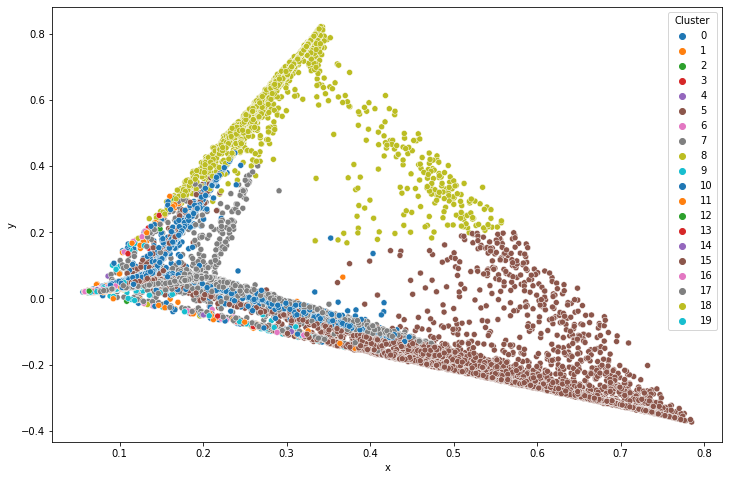

In [ ]:
plotCluster(results) # plotting the clusters from  basic Latent Dirichlet Allocation model

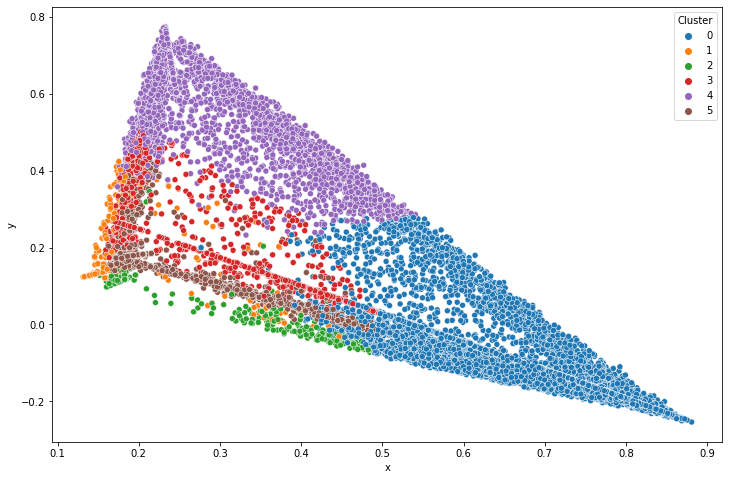

In [ ]:
plotCluster(best_results)